# Видеокурс по теории вероятностей и математической статистике
# GeekBrains
### ДЗ Урока 3
### Казанцев Виталий

### Задача 1
Даны значения зарплат из выборки выпускников:
100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150
 
Используя только встроенные питоновские функции и структуры данных (т.е. без библиотек numpy, pandas и др.), посчитайте (несмещённое) среднее квадратичное отклонение для данной выборки.

In [1]:
salary = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150]
sum(salary) / len(salary)

73.14285714285714

In [2]:
def std_(lst: list):
    mean_ = sum(lst) / len(lst)
    d = 0
    for el in lst:
        d += (el - mean_)**2
    d = d / (len(lst) - 1)
    return d**(1/2)

In [3]:
std_(salary)

47.34795213553139

Проверим решение средствами numpy

In [4]:
import numpy as np

sal = np.array(salary)
sal.std(ddof=1)

47.347952135531386

### Ответ:
Среднее квадратичное представленной выборки равно примероно 47

### Задача 2
Найдите число выбросов в выборке из задачи 1. Для определения выбросов используйте методику как при построении “усов” в boxplot, однако, как и в задаче 1, пользоваться можно только встроенными функциями и структурами данных.


In [5]:
len(salary) % 4

1

На 4 не делится значит, значит

In [6]:
salary = sorted(salary)
print(salary)
q1 = salary[len(salary) // 4]
q3 = salary[3 * len(salary) // 4]
iqr = q3 - q1
q1, q3, iqr

[17, 24, 25, 30, 33, 45, 55, 57, 65, 65, 70, 75, 75, 77, 80, 84, 89, 90, 100, 150, 230]


(45, 84, 39)

In [7]:
boders = [q1 - 1.5 * iqr, q3 + 1.5 * iqr]
boders

[-13.5, 142.5]

In [8]:
blowout =  []
for el in salary:
    if el < boders[0] or el > boders[1]:
        blowout.append(el)
        
len(blowout)

2

Проверим средствами matplotlib

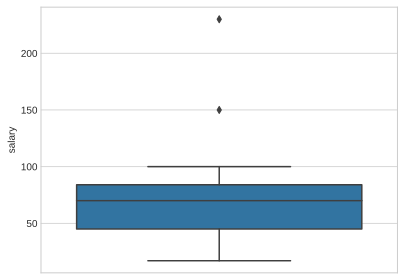

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_formats = ['svg']

df = pd.DataFrame(salary, columns=['salary'])
sns.boxplot(data=df, y='salary')
plt.show()

### Ответ:
В представленной выборке два выброса, это значения 150 и 230

### Задача 3
В университет на факультет A поступило 100 человек, на факультет B - 90 человек и на факультет C - 45 человек. Вероятность того, что студент с факультета A сдаст первую сессию, равна 0.6. Для студента с факультета B эта вероятность равна 0.7, а для студента с факультета C - 0.8. Случайным образом выбирается студент, сдавший первую сессию. Какое событие наиболее вероятно:  
    __*1*__ студент учится на факультете A,  
    __*2*__ студент учится на факультете B,  
    __*3*__ студент учится на факультете C?  


В данном случае можно воспользоваться формулой Байеса и просчитать вероятность для каждого случая при условии H, что студент сдал экзамен. Например для студента c факультета A:
### $P(A|H) = \frac{P(H|A)\cdot P(A)}{P(H)}$

### $P(H|A)=0.6$
### $P(H|B)=0.7$
### $P(H|C)=0.8$
### $P(A)=\frac{1}{100}$
### $P(B)=\frac{1}{90}$
### $P(C)=\frac{1}{45}$
### $P(H)=P(A)\cdot P(H|A)+P(B)\cdot P(H|B)+P(C)\cdot P(H|C)$

In [10]:
pha = 0.6
phb = 0.7
phc = 0.8
pa = 100 / 235
pb = 90 / 235
pc = 45 / 235

In [11]:
ph = pa * pha + pb * phb + pc * phc
ph

0.676595744680851

### $P(A|H)= \frac{P(H|A)\cdot P(A)}{P(H)}$

In [12]:
pah = pha * pa / ph
pah

0.3773584905660377

### $P(B|H)= \frac{P(H|B)\cdot P(B)}{P(H)}$

In [13]:
pbh = phb * pb / ph
pbh

0.39622641509433965

### $P(C|H)= \frac{P(H|C)\cdot P(C)}{P(H)}$

In [15]:
pch = phc * pc / ph
pch

0.22641509433962265

### Ответ:
Более вероятно что студент с факультета В.